# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD28"
COLLABORATORS = "Radosław Matuszczyk 405124, Piotr Łukasiewicz 406163"

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 3/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanych wcześniej plików daily_bike_traffic_data.pkl i  weather_data.pkl do tablic `daily_bike_traffic_data` oraz `weather_data`.

Wyświetl przygotowane tablice.

In [4]:
# Ruch rowerowy
bike_traffic_data = pd.read_pickle('bike_traffic_data.pkl')
bike_traffic_data

,Total,East,West
Date,,,
2022-01-01 00:00,0,0,0
2022-01-01 01:00,0,0,0
2022-01-01 02:00,1,0,1
2022-01-01 03:00,0,0,0
2022-01-01 04:00,0,0,0
...,...,...,...
2022-12-31 19:00,14,6,8
2022-12-31 20:00,20,13,7
2022-12-31 21:00,16,6,10


In [5]:
# Pogoda
weather_data = pd.read_pickle('weather_data.pkl')
weather_data_cols = weather_data.columns
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

### Zadnie 4: Analiza korelacji [10 pkt]

#### a) Korelacje liniowe pomiędzy parametrami pogody a liczbą rowerzystów

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_1` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_1` pomiędzy wartościami parametrów pogody, a liczbą rowerzystów przejeżdżających przez most danego dnia.

Tablice powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data` </br>

> Kolumny: zestaw indeksów identycznych z nazwami kolumn tablicy `daily_bike_traffic_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [6]:
# Tabela R
daily_bike_traffic_data = bike_traffic_data.resample('D').sum()
weather_data.columns = ['-'.join(col) for col in weather_data.columns.values]
merged = weather_data.merge(daily_bike_traffic_data, left_index=True, right_index=True)
R_corr_1 = merged.corr()
R_corr_1.drop(index=['Total', 'East', 'West'], inplace=True)
R_corr_1 = R_corr_1[['Total', 'East', 'West']]
R_corr_1.index = weather_data_cols
R_corr_1

Total      East      West
Temperature   Min          0.701655  0.713808  0.679126
              Avg          0.770827  0.790259  0.742272
              Max          0.788875  0.812116  0.757500
Precipitation Total       -0.451900 -0.464786 -0.434036
Snow          Fall        -0.147524 -0.151355 -0.141992
              Depth       -0.236888 -0.238268 -0.231044
Wind          Avg speed   -0.237627 -0.245192 -0.227817
              Max speed   -0.345763 -0.344373 -0.339481
Sky           Cloud cover -0.569683 -0.583611 -0.548878

In [7]:
# Tabela R^2
R2_corr_1 = R_corr_1**2
R2_corr_1

Total      East      West
Temperature   Min          0.492320  0.509522  0.461212
              Avg          0.594174  0.624509  0.550968
              Max          0.622324  0.659533  0.573806
Precipitation Total        0.204213  0.216026  0.188387
Snow          Fall         0.021763  0.022908  0.020162
              Depth        0.056116  0.056772  0.053381
Wind          Avg speed    0.056467  0.060119  0.051901
              Max speed    0.119552  0.118593  0.115248
Sky           Cloud cover  0.324539  0.340601  0.301267

In [8]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_1.loc[("Temperature", "Min"), "Total"], 0.7016549936827619)
assert np.isclose(R_corr_1.loc[('Snow', 'Fall'), "East"], -0.1513545851889312)
assert np.isclose(R_corr_1.loc[('Wind', 'Max speed'), "West"], -0.3394814202230162)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_1.loc[("Temperature", "Avg"), "Total"], 0.5941735252448272)
assert np.isclose(R2_corr_1.loc[("Precipitation", "Total"), "East"], 0.21602605629121266)
assert np.isclose(R2_corr_1.loc[("Sky", "Cloud cover"), "West"], 0.3012666920823503)

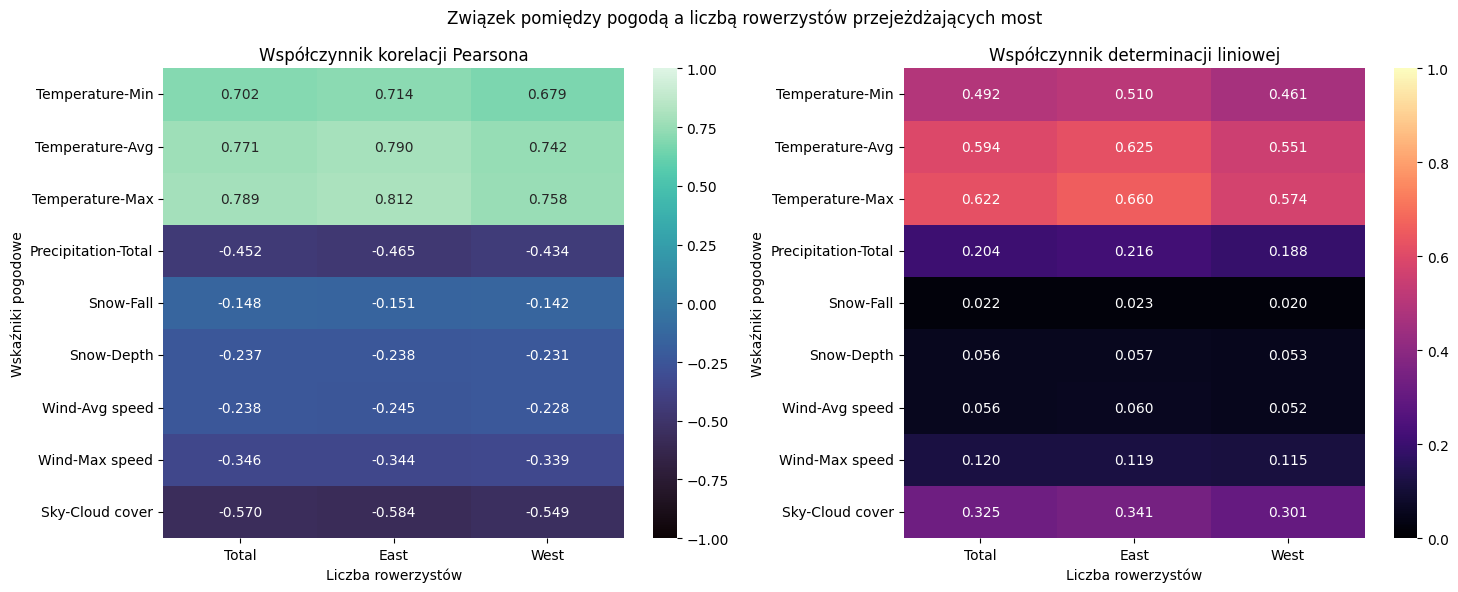

In [9]:
# Wykresy
# YOUR CODE HERE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,6])
sns.heatmap(data=R_corr_1, ax=ax1, annot=True, fmt='.3f', cmap="mako", vmin=-1, vmax=1)
ax1.set_title('Współczynnik korelacji Pearsona')
ax1.set_xlabel('Liczba rowerzystów')
ax1.set_ylabel('Wskaźniki pogodowe')
sns.heatmap(data=R2_corr_1, ax=ax2, annot=True, fmt='.3f', cmap="magma", vmin=0, vmax=1)
ax2.set_title('Współczynnik determinacji liniowej')
ax2.set_xlabel('Liczba rowerzystów')
ax2.set_ylabel('Wskaźniki pogodowe')
fig.suptitle('Związek pomiędzy pogodą a liczbą rowerzystów przejeżdżających most')
fig.tight_layout()
fig.savefig('correlations.png')

#### b) Korelacje liniowe między parametrami pogody

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_2` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_2` pomiędzy wartościami parametrów pogody.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
    > Kolumny: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [10]:
# Tablica R
daily_bike_traffic_data = bike_traffic_data.resample('D').sum()
R_corr_2 = weather_data.corr()
R_corr_2.index = R_corr_2.columns = weather_data_cols
R_corr_2

Temperature                     Precipitation  \
                                  Min       Avg       Max         Total   
Temperature   Min            1.000000  0.968181  0.912105     -0.155075   
              Avg            0.968181  1.000000  0.985318     -0.214915   
              Max            0.912105  0.985318  1.000000     -0.248470   
Precipitation Total         -0.155075 -0.214915 -0.248470      1.000000   
Snow          Fall          -0.157051 -0.153328 -0.144705      0.113559   
              Depth         -0.232855 -0.215784 -0.195137      0.101258   
Wind          Avg speed     -0.104067 -0.129015 -0.142560      0.234759   
              Max speed     -0.201248 -0.216144 -0.220302      0.271173   
Sky           Cloud cover   -0.355002 -0.527832 -0.624834      0.354008   

                               Snow                Wind                   Sky  
                               Fall     Depth Avg speed Max speed Cloud cover  
Temperature   Min         -0.157051 -0.232855 -0.104067 -0.201248   -0.355002  
              Avg         -0.153328 -0.215784 -0.129015 -0.216144   -0.527832  
              Max         -0.144705 -0.195137 -0.142560 -0.220302   -0.624834  
Precipitation Total        0.113559  0.101258  0.234759  0.271173    0.354008  
Snow          Fall         1.000000  0.413288  0.088428  0.079644    0.018200  
              Depth        0.413288  1.000000  0.084515  0.068790    0.057158  
Wind          Avg speed    0.088428  0.084515  1.000000  0.871593    0.111220  
              Max speed    0.079644  0.068790  0.871593  1.000000    0.197062  
Sky           Cloud cover  0.018200  0.057158  0.111220  0.197062    1.000000

In [11]:
# Tablica R^2
# YOUR CODE HERE
R2_corr_2 = R_corr_2**2
R2_corr_2

Temperature                     Precipitation  \
                                  Min       Avg       Max         Total   
Temperature   Min            1.000000  0.937374  0.831935      0.024048   
              Avg            0.937374  1.000000  0.970852      0.046189   
              Max            0.831935  0.970852  1.000000      0.061738   
Precipitation Total          0.024048  0.046189  0.061738      1.000000   
Snow          Fall           0.024665  0.023509  0.020940      0.012896   
              Depth          0.054221  0.046563  0.038079      0.010253   
Wind          Avg speed      0.010830  0.016645  0.020323      0.055112   
              Max speed      0.040501  0.046718  0.048533      0.073535   
Sky           Cloud cover    0.126026  0.278606  0.390417      0.125322   

                               Snow                Wind                   Sky  
                               Fall     Depth Avg speed Max speed Cloud cover  
Temperature   Min          0.024665  0.054221  0.010830  0.040501    0.126026  
              Avg          0.023509  0.046563  0.016645  0.046718    0.278606  
              Max          0.020940  0.038079  0.020323  0.048533    0.390417  
Precipitation Total        0.012896  0.010253  0.055112  0.073535    0.125322  
Snow          Fall         1.000000  0.170807  0.007820  0.006343    0.000331  
              Depth        0.170807  1.000000  0.007143  0.004732    0.003267  
Wind          Avg speed    0.007820  0.007143  1.000000  0.759674    0.012370  
              Max speed    0.006343  0.004732  0.759674  1.000000    0.038833  
Sky           Cloud cover  0.000331  0.003267  0.012370  0.038833    1.000000

In [12]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_2.loc[("Temperature", "Avg"), ('Snow', 'Fall')], -0.15332754676249075)
assert np.isclose(R_corr_2.loc[("Precipitation", "Total"), ("Wind", "Max speed")], 0.27117268223209673)
assert np.isclose(R_corr_2.loc[("Sky", "Cloud cover"), ("Temperature", "Max")], -0.6248338895216168)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_2.loc[("Snow", "Depth"), ("Wind", "Max speed")], 0.004732081693920376)
assert np.isclose(R2_corr_2.loc[("Temperature", "Min"), ("Temperature", "Avg")], 0.9373738975008452)
assert np.isclose(R2_corr_2.loc[("Precipitation", "Total"), ("Sky", "Cloud cover")], 0.12532191894477251)

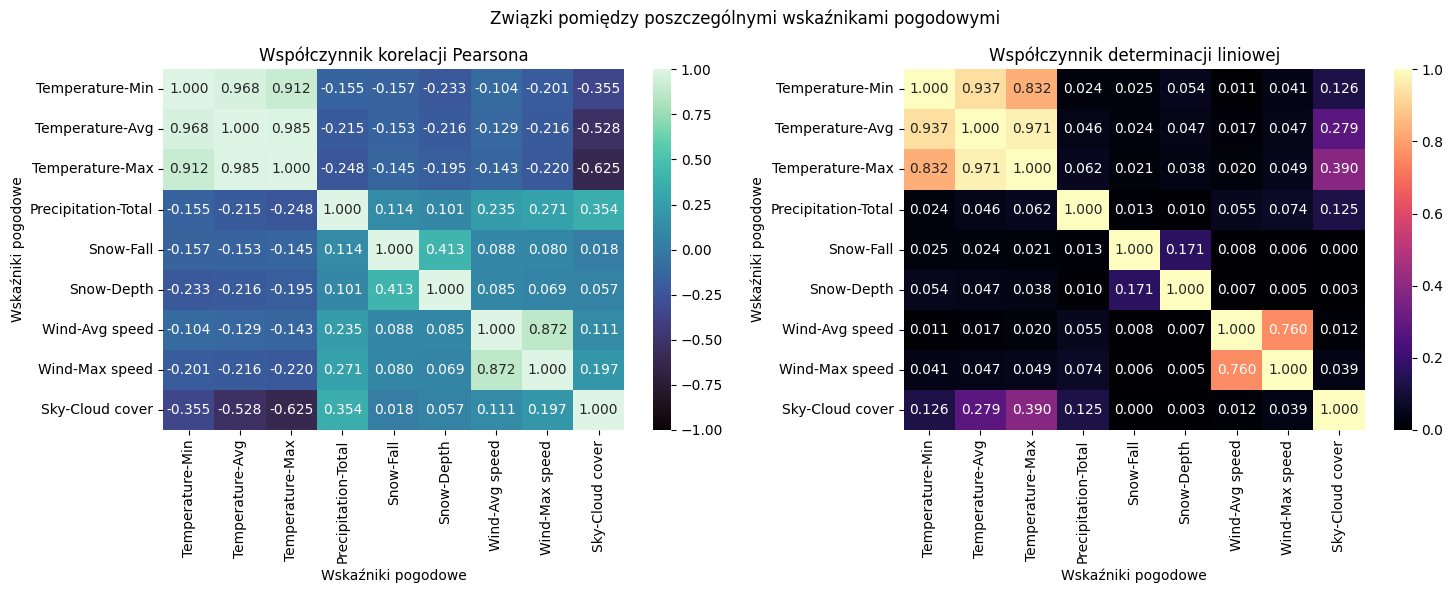

In [13]:
# Wykresy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,6])
sns.heatmap(data=R_corr_2, ax=ax1, annot=True, fmt='.3f', cmap="mako", vmin=-1, vmax=1)
ax1.set_title('Współczynnik korelacji Pearsona')
ax1.set_xlabel('Wskaźniki pogodowe')
ax1.set_ylabel('Wskaźniki pogodowe')
sns.heatmap(data=R2_corr_2, ax=ax2, annot=True, fmt='.3f', cmap="magma", vmin=0, vmax=1)
ax2.set_title('Współczynnik determinacji liniowej')
ax2.set_xlabel('Wskaźniki pogodowe')
ax2.set_ylabel('Wskaźniki pogodowe')
fig.suptitle('Związki pomiędzy poszczególnymi wskaźnikami pogodowymi')
fig.tight_layout()

### Zadnie 5: Analiza regresji [25 pkt]

#### a) Regresja liniowa

Korzystając z funkcji `scipy.stats.linregress()` przygotuj tablicę `regression_data_1` zawierającą wartości współczynników równania regresji liniowej pomiędzy wartościami parametrów pogody (zmienna niezależna, objaśniająca), a liczbą rowerzystów przejeżdżających przez most danego dnia (zmienna zależna, objaśniana).

- Tablica powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy weather_data</br>
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie prostymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [14]:
# Tabela
# YOUR CODE HERE
weather_data.columns = weather_data_cols
regression_data_1 = pd.DataFrame(index=weather_data.columns, columns=pd.MultiIndex.from_product([bike_traffic_data.columns, ['a', 'b']]))

for w_col in weather_data.columns:
    for b_col in daily_bike_traffic_data:
        df = pd.DataFrame()
        df['x'] = weather_data[w_col]
        df['y'] = daily_bike_traffic_data[b_col]
        df.dropna(inplace=True)
        res = sp.stats.linregress(df['x'].to_numpy().astype('float'), df['y'].to_numpy().astype('float'))
        regression_data_1.loc[w_col][b_col, 'a'] = res.slope
        regression_data_1.loc[w_col][b_col, 'b'] = res.intercept

regression_data_1

Total                     East               \
                                     a            b           a            b   
Temperature   Min           130.091544  1233.183164   52.545345   495.832706   
              Avg           118.374556     801.2281   48.119192   317.419578   
              Max            99.799395   611.670391   40.730313   237.665453   
Precipitation Total         -62.871587  2372.922056  -25.667265   956.796053   
Snow          Fall          -39.438106  2200.950745  -16.064208   886.648162   
              Depth         -35.935386   2219.81073  -14.352083   894.009657   
Wind          Avg speed    -182.403448  2796.773877  -74.722899  1130.768534   
              Max speed    -155.141469  3286.343417  -61.346493  1315.647819   
Sky           Cloud cover -2017.975053  3548.962864 -820.760887  1434.908796   

                                  West               
                                     a            b  
Temperature   Min            77.546199   737.350459  
              Avg            70.255365   483.808522  
              Max            59.069082   374.004938  
Precipitation Total         -37.204323  1416.126003  
Snow          Fall          -23.373898  1314.302583  
              Depth         -21.583302  1325.801073  
Wind          Avg speed    -107.680549  1666.005344  
              Max speed     -93.794975  1970.695598  
Sky           Cloud cover -1197.214166  2114.054068

In [15]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_1
assert np.isclose(regression_data_1.loc[("Temperature", "Avg"), ('Total', 'a')], 118.37455627981312)
assert np.isclose(regression_data_1.loc[("Snow", "Depth"), ('Total', 'b')], 2219.810729613734)
assert np.isclose(regression_data_1.loc[("Wind", "Avg speed"), ('East', 'a')], -74.72308463717329)
assert np.isclose(regression_data_1.loc[("Precipitation", "Total"), ('East', 'b')], 956.7960528263079)
assert np.isclose(regression_data_1.loc[("Temperature", "Min"), ('West', 'a')], 77.54619929276554)
assert np.isclose(regression_data_1.loc[("Wind", "Max speed"), ('West', 'b')], 1970.6955983993344)

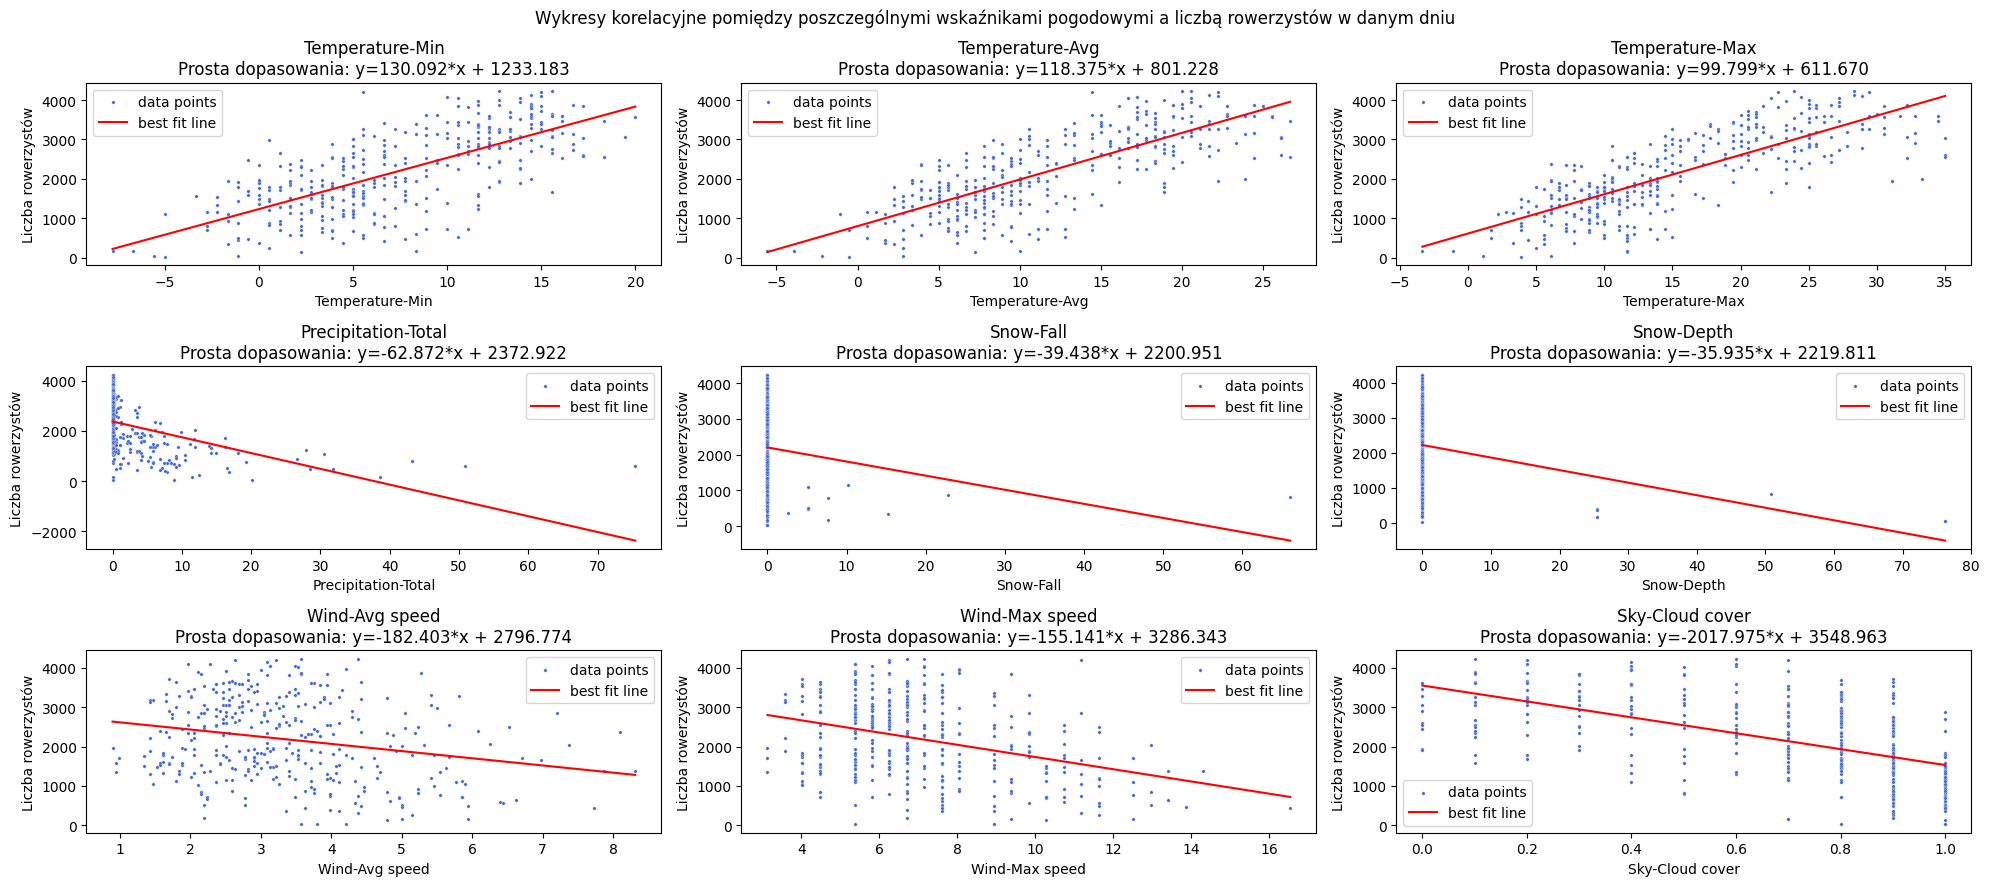

In [16]:
# Wykresy

fig, ax = plt.subplots(3,3, figsize=[20, 9])

def plot_corr(weather_col, ax):
    sns.scatterplot(x=weather_data[weather_col], y=daily_bike_traffic_data['Total'], ax=ax, s=6, c='royalblue')
    x_range = np.linspace(weather_data[weather_col].min(), weather_data[weather_col].max(), 100)
    a = regression_data_1.loc[weather_col]['Total', 'a']
    b = regression_data_1.loc[weather_col]['Total', 'b']
    sns.lineplot(x=x_range, y = a*x_range + b, ax=ax, c='red')
    ax.set_title(f'{"-".join(weather_col)}\nProsta dopasowania: y={a :.3f}*x + {b :.3f}')
    ax.set_xlabel("-".join(weather_col))
    ax.set_ylabel('Liczba rowerzystów')
    ax.legend(['data points', 'best fit line'], loc='best')
    
                 
plot_corr(('Temperature', 'Min'), ax[0,0])
plot_corr(('Temperature', 'Avg'), ax[0,1])
plot_corr(('Temperature', 'Max'), ax[0,2])
plot_corr(('Precipitation', 'Total'), ax[1,0])
plot_corr(('Snow', 'Fall'), ax[1,1])
plot_corr(('Snow', 'Depth'), ax[1,2])
plot_corr(('Wind', 'Avg speed'), ax[2,0])
plot_corr(('Wind', 'Max speed'), ax[2,1])
plot_corr(('Sky', 'Cloud cover'), ax[2,2])

fig.suptitle('Wykresy korelacyjne pomiędzy poszczególnymi wskaźnikami pogodowymi a liczbą rowerzystów w danym dniu')
fig.tight_layout()
plt.show(fig)
fig.savefig('corr_plots.png')

#### b) Regresja krzywoliniowa

Pobieżna analiza wykresów przygotowanych we wcześniejszym podpunkcie pokazuje, że w kilku przypadkach relacje między zmiennymi są bardziej skomplikowane i prosta regresja liniowa nie jest dobrym przybliżeniem obserwowanego trendu.

Korzystając z funkcji `scipy.optimize.curve_fit()` przygotuj tablicę `regression_data_2` zawierającą współczynniki równań regresji między zachmurzeniem, a liczbą rowerzystów przejeżdżających przez most danego dnia oraz między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia. W obu przypadkach skorzystaj z następującego równania regresji:
$$ y = a e^{-bx} + c$$ 
gdzie: a, b, c - współczynniki równania dobierane metodą najmniejszych kwadratów.

W przypadku regresji między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia ustaw parametry funkcji w taki sposób, aby wartość współczynnika c zawierała się w przedziale 90% - 110% wartości średniej liczby rowerzystów z 10 dni w roku z największą ilością opadów.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: </br>
    > 1 rzędu: Sky, Precipitation</br>
    > 2 rzędu: Cloud cover, Total (sparowane pojedynczo z odpowiadającymi im indeksami 1 rzędu tak jak w nazwach kolumn tablicy `weather_data`)</br>    
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b, c (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy liczby wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie krzywymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [17]:
# Obliczenia i tablica
# YOUR CODE HERE
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

regression_data_2 = pd.DataFrame(index=pd.MultiIndex.from_arrays([('Sky', 'Precipitation'), ('Cloud cover', 'Total')]), columns=pd.MultiIndex.from_product([bike_traffic_data.columns, ['a', 'b', 'c']]))

for w_col in regression_data_2.index:
    for b_col in daily_bike_traffic_data:
        df = pd.DataFrame()
        df['x'] = weather_data[w_col]
        df['y'] = daily_bike_traffic_data[b_col]
        df.dropna(inplace=True)
        if w_col[0] == 'Precipitation':
            a = df['x'].to_numpy()
            ind = np.argpartition(a, -10)[-10:]
            b = df['y'].to_numpy()
            m = b[ind].mean()
            params, cov = sp.optimize.curve_fit(func, df['x'].to_numpy().astype('float64'), df['y'].to_numpy().astype('float64'), 
                                               bounds=((-np.inf, -np.inf, 0.9*m) ,(np.inf, np.inf, 1.1*m)))
        else:
            params, cov = sp.optimize.curve_fit(func, df['x'].to_numpy().astype('float64'), df['y'].to_numpy().astype('float64'))
        
        regression_data_2.loc[w_col][b_col, 'a'] = params[0]
        regression_data_2.loc[w_col][b_col, 'b'] = params[1]
        regression_data_2.loc[w_col][b_col, 'c'] = params[2]

regression_data_2

C:\Users\Radek\AppData\Local\Temp\ipykernel_8304\951506390.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
C:\Users\Radek\AppData\Local\Temp\ipykernel_8304\951506390.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


Total                               East  \
                                     a         b            c           a   
Sky           Cloud cover   -57.237576 -3.552224  3112.824205   -22.23427   
Precipitation Total        1897.344561  0.226743       697.29  781.157524   

                                                         West            \
                                  b            c            a         b   
Sky           Cloud cover -3.597465  1254.852404   -35.041445 -3.521346   
Precipitation Total         0.22252       265.76  1116.152667  0.229589   

                                        
                                     c  
Sky           Cloud cover  1858.021432  
Precipitation Total             431.53

In [18]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_2
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'a')], 1897.3445607675376)
assert np.isclose(regression_data_2.loc[(("Sky", "Cloud cover")), ('East', 'b')], -3.5974646434134456)
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'c')], 697.29)

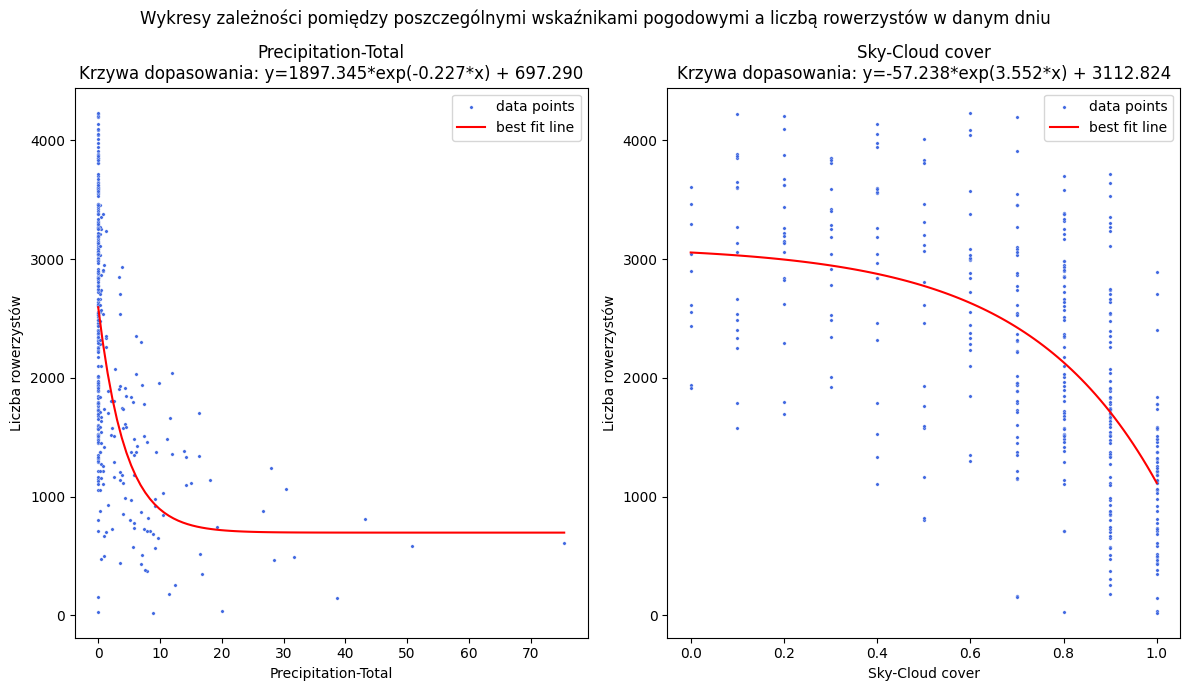

In [19]:
# Wykres
# Wykresy

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12, 7])

def plot_corr(weather_col, ax):
    sns.scatterplot(x=weather_data[weather_col], y=daily_bike_traffic_data['Total'], ax=ax, s=6, c='royalblue')
    x_range = np.linspace(weather_data[weather_col].min(), weather_data[weather_col].max(), 100)
    a = regression_data_2.loc[weather_col]['Total', 'a']
    b = regression_data_2.loc[weather_col]['Total', 'b']
    c = regression_data_2.loc[weather_col]['Total', 'c']
    sns.lineplot(x=x_range, y = func(x_range, a, b, c), ax=ax, c='red')
    ax.set_title(f'{"-".join(weather_col)}\nKrzywa dopasowania: y={a :.3f}*exp({-b :.3f}*x) + {c :.3f}')
    ax.set_xlabel("-".join(weather_col))
    ax.set_ylabel('Liczba rowerzystów')
    ax.legend(['data points', 'best fit line'], loc='best')
    
                 
plot_corr(('Precipitation', 'Total'), ax1)
plot_corr(('Sky', 'Cloud cover'), ax2)

fig.suptitle('Wykresy zależności pomiędzy poszczególnymi wskaźnikami pogodowymi a liczbą rowerzystów w danym dniu')
fig.tight_layout()
plt.show(fig)